Analysing potential factors that contribute to access to healthy food in 2015.

In [1]:
## Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress



In [2]:

# Import the Excel files and read the tabs we need into dataframes.

#Food Environment Atlas -  DataDownload
xls1 = pd.ExcelFile('DataDownload.xls')

##Access Dataframe 
df1 = pd.read_excel(xls1, 'ACCESS')
df1 = df1[["FIPS", "State", "County","LACCESS_POP15","PCT_LACCESS_POP15"]]
df1= df1.rename(columns = {'LACCESS_POP15':'Population with low access',
                           'PCT_LACCESS_POP15':'Percent of population with low access'})

##Income Dataframe
df2 = pd.read_excel(xls1,'SOCIOECONOMIC')
df2 = df2[["FIPS", "State", "County","MEDHHINC15"]]
df2 = df2.rename(columns = {"MEDHHINC15" : "Median Household Income 2015"})





#County Level Data - Education
xls2 = pd.ExcelFile('Education.xls')

##Education Dataframe
df3 = pd.read_excel(xls2,skiprows=4)

##Trim Education Dataframe to include only the columns we need from 2013-17

df3=df3[["FIPS Code",
      "Less than a high school diploma, 2013-17",
      "High school diploma only, 2013-17",
      "Some college or associate's degree, 2013-17",
      "Bachelor's degree or higher, 2013-17",
      "Percent of adults with less than a high school diploma, 2013-17",
      "Percent of adults with a high school diploma only, 2013-17",
      "Percent of adults completing some college or associate's degree, 2013-17",
      "Percent of adults with a bachelor's degree or higher, 2013-17"
     ]]

df3= df3.rename(columns = {"FIPS Code":"FIPS",
                            "Percent of adults with less than a high school diploma, 2013-17":"% of adults with less than a high school diploma, 2013-17",
                            "Percent of adults with a high school diploma only, 2013-17":"% of adults with a high school diploma only, 2013-17",
                            "Percent of adults completing some college or associate's degree, 2013-17": "% of adults completing some college or associate's degree, 2013-17",
                            "Percent of adults with a bachelor's degree or higher, 2013-17":"% of adults with a bachelor's degree or higher, 2013-17"
                          })
                           
        


#County Level Data - PopulationEstimates
xls3 = pd.ExcelFile('PopulationEstimates.xls')

## Population Dataframe
df4 = pd.read_excel(xls3,'Population Estimates 2010-18',skiprows=2)
df4 = df4[['FIPS','POP_ESTIMATE_2015']]
df4= df4.rename(columns = {"POP_ESTIMATE_2015":"2015 Population Estimate"})


#df1.head()
#df2.head()
#df3.head()
#df4.head()

In [3]:
# Merge Population with Access

access_df = df4.merge(df1, on='FIPS')
access_df["% of population with low access"]= (access_df["Population with low access"]/access_df["2015 Population Estimate"])*100

# Change order of columns
access_df=access_df[["FIPS", "State", "County","2015 Population Estimate", "Population with low access","% of population with low access"]]

#access_df.head()

In [4]:
# Merge Access df with Income

income_df = access_df.merge(df2)
#income_df.head()

In [5]:
# Merge Income with Education to have all dataframes merged into one

access_data = income_df.merge(df3)

#access_data.head()

In [6]:
# look at data for the state of Colorado

CO_data=access_data[access_data['State'] =='CO']

# Verify there are no blank cells in this df
CO_data.count()


CO_data.head()

,FIPS,State,County,2015 Population Estimate,Population with low access,% of population with low access,Median Household Income 2015,"Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","% of adults with less than a high school diploma, 2013-17","% of adults with a high school diploma only, 2013-17","% of adults completing some college or associate's degree, 2013-17","% of adults with a bachelor's degree or higher, 2013-17"
243,8001,CO,Adams,490768,66895.714251,13.630822,62991.0,54006.0,87917.0,97054.0,71613.0,17.4,28.3,31.2,23.1
244,8003,CO,Alamosa,16314,915.186239,5.609821,40067.0,1588.0,2367.0,2987.0,2469.0,16.9,25.2,31.7,26.2
245,8005,CO,Arapahoe,630637,69481.673398,11.017697,67062.0,32522.0,87155.0,126608.0,175266.0,7.7,20.7,30.0,41.6
246,8007,CO,Archuleta,12393,3600.901552,29.055931,50361.0,902.0,2210.0,2869.0,3508.0,9.5,23.3,30.2,37.0
247,8009,CO,Baca,3553,955.224505,26.885013,35405.0,379.0,695.0,976.0,558.0,14.5,26.6,37.4,21.4


In [7]:
percent_low_access = CO_data['% of population with low access']
percent_less_than_hs = CO_data['% of adults with less than a high school diploma, 2013-17']
percent_hs = CO_data['% of adults with a high school diploma only, 2013-17']
percent_some_secondary_education = CO_data['% of adults completing some college or associate\'s degree, 2013-17']
percent_bachelor_or_higher = CO_data['% of adults with a bachelor\'s degree or higher, 2013-17']

The correlation between both factors is 0.03


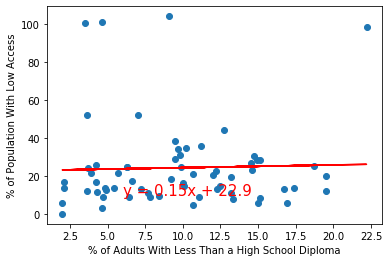

In [8]:
x_values =percent_less_than_hs 
y_values =percent_low_access
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('% of Adults With Less Than a High School Diploma') 
plt.ylabel('% of Population With Low Access')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('Adults With Less Than HS Diploma vs. Population With Low Access.png')
plt.show()

The correlation between both factors is 0.33


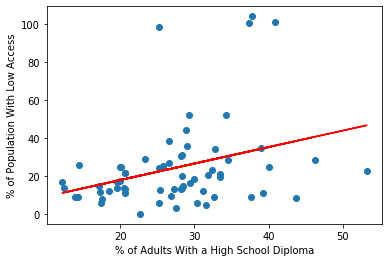

In [9]:
x_values =percent_hs
y_values =percent_low_access
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('% of Adults With a High School Diploma') 
plt.ylabel('% of Population With Low Access')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('Adults With HS Diploma vs. Population With Low Access.png')
plt.show()

The correlation between both factors is 0.18


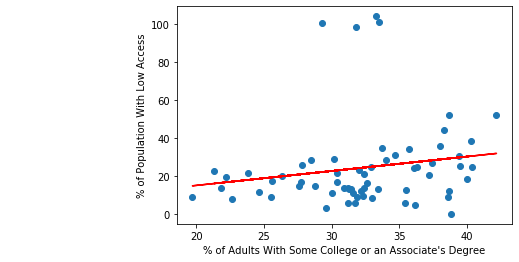

In [10]:
x_values =percent_some_secondary_education 
y_values =percent_low_access
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('% of Adults With Some College or an Associate\'s Degree') 
plt.ylabel('% of Population With Low Access')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('Adults With Some College or an Associate\'s Degree vs. Population With Low Access.png')
plt.show()

The correlation between both factors is -0.28


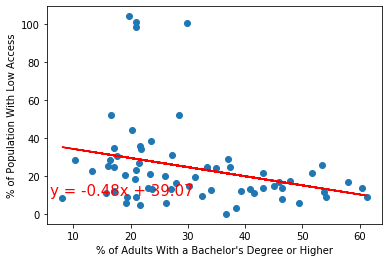

In [11]:
x_values =percent_bachelor_or_higher 
y_values =percent_low_access
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('% of Adults With a Bachelor\'s Degree or Higher') 
plt.ylabel('% of Population With Low Access')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('Adults With a Bachelor\'s Degree or Higher vs. Population With Low Access.png')
plt.show()